In [1]:
class Student:
    #class variable
    total_marks =1000
    def __init__(self,name,roll_num,marks):
        self.name= name
        self.roll_num=roll_num
        self.marks=marks
        self.total_marks= Student.total_marks

    def result(self):
        return 'Pass' if self.marks > 500 else 'Fail'
    @property
    def get_total_marks(self):
        return self.total_marks
    

In [2]:
student1=Student('nitesh',101,100)

In [3]:
student1.result()

'Fail'

In [4]:
student1.get_total_marks

1000

In [5]:
student1.total_marks=2000

In [6]:
student1.get_total_marks()

TypeError: 'int' object is not callable

## create class using statement

In [7]:
class StudentInfo:
    def __init__(self,name,age):
        self.name=name
        self.age=age
    def __repr__(self):
        return f'Name-{self.name} and Age-{self.age} years'
    
    @classmethod
    def create_from_string(clr,string):
        import re
        fields= re.findall(r'is (\w+)*',string)
        name= fields[0]
        age=fields[1]
        return clr(name,age)
    
    

In [8]:
stydent=StudentInfo.create_from_string('My name is nitesh and my age is 30 years')

In [9]:
stydent

Name-nitesh and Age-30 years

# Inheritance

In [10]:
class Person:
    def __init__(self,name,age,place):
        self.name=name
        self.age=age
        self.place=place

    def show_info(self):
        return f'Person is {self.name} and age is {self.age} years from {self.place}'
    

In [11]:
class Employee(Person):
    def __init__(self,name,age,place,company,designation):
        Person.__init__(self,name,age,place)
        self.company=company
        self.designation=designation
    def get_employee_info(self):
        return f'{self.show_info()} and employee is {self.company} with {self.designation}'

In [12]:
employee=Employee('nitesh',40,'Patna','MS','manager')

In [13]:
employee.get_employee_info()

'Person is nitesh and age is 40 years from Patna and employee is MS with manager'

In [14]:
employee.show_info()

'Person is nitesh and age is 40 years from Patna'

In [15]:
class Employee(Person):
    def __init__(self,name,age,place,company,designation):
        #Person.__init__(self,name,age,place)
        super().__init__(name,age,place)
        self.company=company
        self.designation=designation
    def get_employee_info(self):
        return f'{self.show_info()} and employee is {self.company} with {self.designation}'

In [16]:
employee=Employee('nitesh',40,'Patna','MS','manager')

In [17]:
employee.__dict__

{'name': 'nitesh',
 'age': 40,
 'place': 'Patna',
 'company': 'MS',
 'designation': 'manager'}

In [18]:
from IPython.display import IFrame

# Specify the URL, width, and height
IFrame("https://www.example.com", width=800, height=600)

In [19]:
# pip install pandas matplotlib openpyxl seaborn


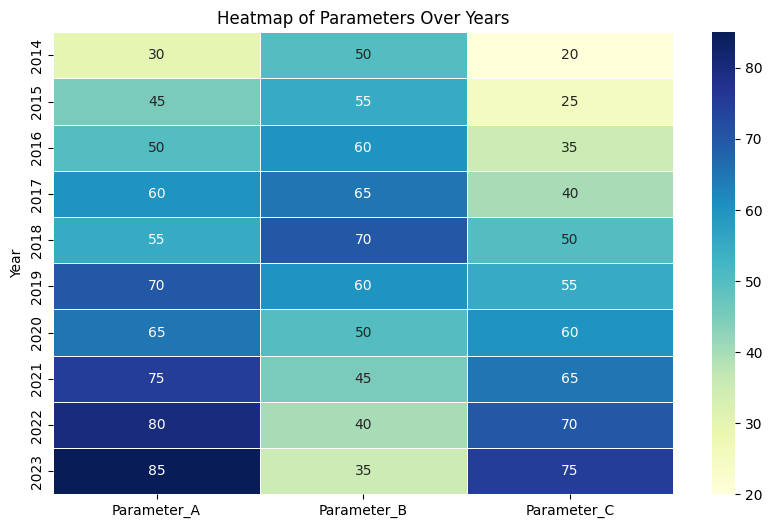

AttributeError: 'OpenpyxlWriter' object has no attribute 'save'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import openpyxl
# Sample data generation (you can replace this with your actual data grid)
data = {
    'Year': list(range(2014, 2024)),
    'Parameter_A': [30, 45, 50, 60, 55, 70, 65, 75, 80, 85],
    'Parameter_B': [50, 55, 60, 65, 70, 60, 50, 45, 40, 35],
    'Parameter_C': [20, 25, 35, 40, 50, 55, 60, 65, 70, 75]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Set 'Year' as the index for better visualization
df.set_index('Year', inplace=True)

# Generate the heatmap using seaborn (in-memory visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="g", linewidths=0.5, cbar=True)
plt.title('Heatmap of Parameters Over Years')
plt.show()

# Optionally, export the heatmap directly to Excel
def export_to_excel_with_heatmap(df, filename='heatmap_table.xlsx'):
    # Create a Pandas Excel writer using openpyxl engine
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    df.to_excel(writer, sheet_name='Data')
    
    # Access the workbook and sheet to apply formatting
    workbook = writer.book
    sheet = writer.sheets['Data']
    
    # Define the color scale for heatmap (similar to Excel's conditional formatting)
    for col in range(2, len(df.columns) + 2):  # Skip the year column
        min_val, max_val = df.iloc[:, col - 2].min(), df.iloc[:, col - 2].max()
        for row in range(2, len(df) + 2):
            cell = sheet.cell(row=row, column=col)
            value = cell.value
            # Use a color gradient for heatmap effect
            color = plt.cm.YlGnBu((value - min_val) / (max_val - min_val))
            hex_color = matplotlib.colors.rgb2hex(color[:3])
            cell.fill = openpyxl.styles.PatternFill(start_color=hex_color[1:], end_color=hex_color[1:], fill_type="solid")
    
    # Save the Excel file
    writer.save()
    print(f"Data exported to {filename}")

# Call the function to export data to Excel with heatmap
export_to_excel_with_heatmap(df)


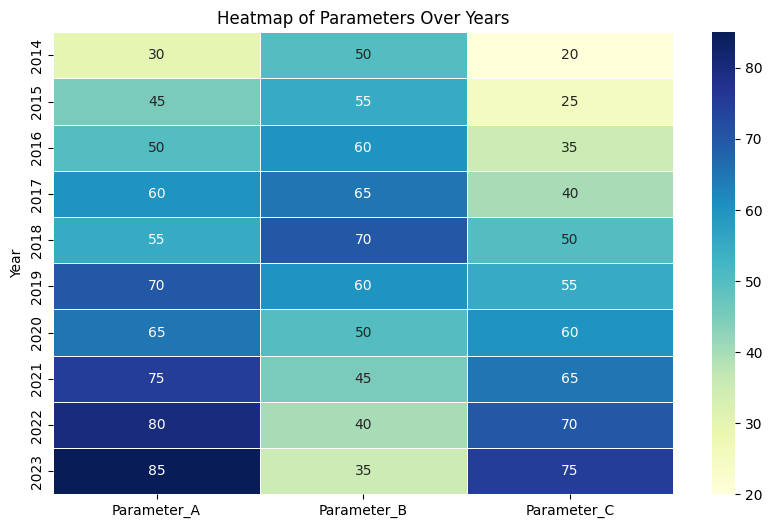

Data exported to heatmap_table.xlsx


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib

# Sample data generation (you can replace this with your actual data grid)
data = {
    'Year': list(range(2014, 2024)),
    'Parameter_A': [30, 45, 50, 60, 55, 70, 65, 75, 80, 85],
    'Parameter_B': [50, 55, 60, 65, 70, 60, 50, 45, 40, 35],
    'Parameter_C': [20, 25, 35, 40, 50, 55, 60, 65, 70, 75]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Set 'Year' as the index for better visualization
df.set_index('Year', inplace=True)

# Generate the heatmap using seaborn (in-memory visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="g", linewidths=0.5, cbar=True)
plt.title('Heatmap of Parameters Over Years')
plt.show()

# Optionally, export the heatmap directly to Excel
def export_to_excel_with_heatmap(df, filename='heatmap_table.xlsx'):
    # Create a Pandas Excel writer using openpyxl engine
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    df.to_excel(writer, sheet_name='Data')
    
    # Access the workbook and sheet to apply formatting
    workbook = writer.book
    sheet = writer.sheets['Data']
    
    # Define the color scale for heatmap (similar to Excel's conditional formatting)
    for col in range(2, len(df.columns) + 2):  # Skip the year column
        min_val, max_val = df.iloc[:, col - 2].min(), df.iloc[:, col - 2].max()
        for row in range(2, len(df) + 2):
            cell = sheet.cell(row=row, column=col)
            value = cell.value
            # Use a color gradient for heatmap effect
            color = plt.cm.YlGnBu((value - min_val) / (max_val - min_val))
            hex_color = matplotlib.colors.rgb2hex(color[:3])
            cell.fill = openpyxl.styles.PatternFill(start_color=hex_color[1:], end_color=hex_color[1:], fill_type="solid")
    
    # Close the writer (this saves the Excel file)
    writer.close()
    print(f"Data exported to {filename}")

# Call the function to export data to Excel with heatmap
export_to_excel_with_heatmap(df)


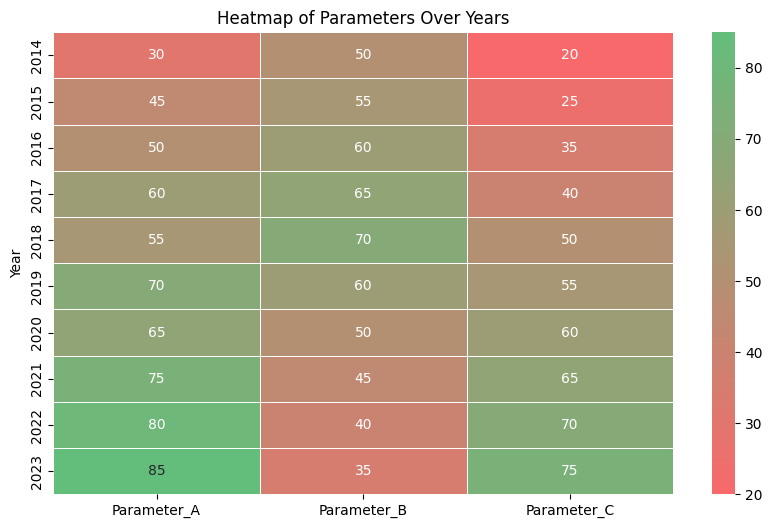

Data exported to heatmap_table.xlsx


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

# Sample data generation (you can replace this with your actual data grid)
data = {
    'Year': list(range(2014, 2024)),
    'Parameter_A': [30, 45, 50, 60, 55, 70, 65, 75, 80, 85],
    'Parameter_B': [50, 55, 60, 65, 70, 60, 50, 45, 40, 35],
    'Parameter_C': [20, 25, 35, 40, 50, 55, 60, 65, 70, 75]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Set 'Year' as the index for better visualization
df.set_index('Year', inplace=True)

# Custom color map from #f8696b (red) to #63be7b (green)
colors = ["#f8696b", "#63be7b"]
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

# Generate the heatmap using seaborn (in-memory visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, fmt="g", linewidths=0.5, cbar=True)
plt.title('Heatmap of Parameters Over Years')
plt.show()

# Optionally, export the heatmap directly to Excel
def export_to_excel_with_heatmap(df, filename='heatmap_table.xlsx'):
    # Create a Pandas Excel writer using openpyxl engine
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    df.to_excel(writer, sheet_name='Data')
    
    # Access the workbook and sheet to apply formatting
    workbook = writer.book
    sheet = writer.sheets['Data']
    
    # Define the color scale for heatmap (red to green)
    for col in range(2, len(df.columns) + 2):  # Skip the year column
        min_val, max_val = df.iloc[:, col - 2].min(), df.iloc[:, col - 2].max()
        for row in range(2, len(df) + 2):
            cell = sheet.cell(row=row, column=col)
            value = cell.value
            # Normalize the value for color mapping (between 0 and 1)
            normalized_value = (value - min_val) / (max_val - min_val)
            # Get the color from the custom colormap
            color = custom_cmap(normalized_value)
            hex_color = matplotlib.colors.rgb2hex(color[:3])
            cell.fill = openpyxl.styles.PatternFill(start_color=hex_color[1:], end_color=hex_color[1:], fill_type="solid")
    
    # Close the writer (this saves the Excel file)
    writer.close()
    print(f"Data exported to {filename}")

# Call the function to export data to Excel with heatmap
export_to_excel_with_heatmap(df)


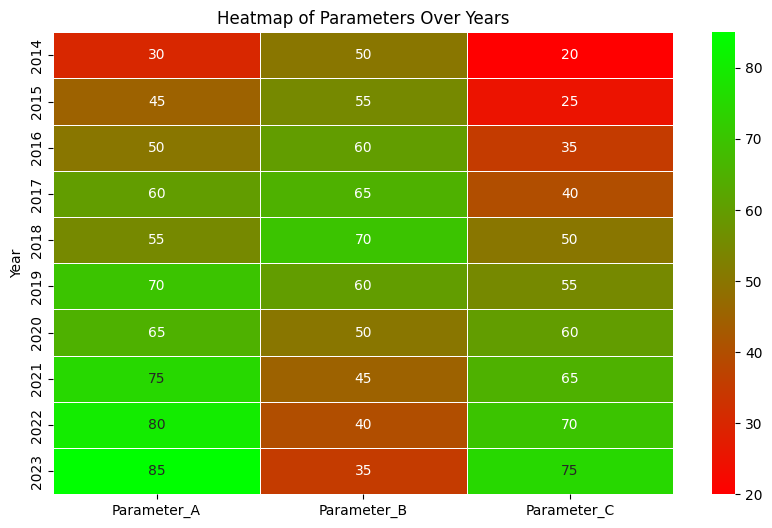

Data exported to heatmap_table.xlsx


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

# Sample data generation (you can replace this with your actual data grid)
data = {
    'Year': list(range(2014, 2024)),
    'Parameter_A': [30, 45, 50, 60, 55, 70, 65, 75, 80, 85],
    'Parameter_B': [50, 55, 60, 65, 70, 60, 50, 45, 40, 35],
    'Parameter_C': [20, 25, 35, 40, 50, 55, 60, 65, 70, 75]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Set 'Year' as the index for better visualization
df.set_index('Year', inplace=True)

# Custom color map from red to green
colors = ["#FF0000", "#00FF00"]  # Red to green
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

# Generate the heatmap using seaborn (in-memory visualization)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, fmt="g", linewidths=0.5, cbar=True)
plt.title('Heatmap of Parameters Over Years')
plt.show()

# Optionally, export the heatmap directly to Excel
def export_to_excel_with_heatmap(df, filename='heatmap_table.xlsx'):
    # Create a Pandas Excel writer using openpyxl engine
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    df.to_excel(writer, sheet_name='Data')
    
    # Access the workbook and sheet to apply formatting
    workbook = writer.book
    sheet = writer.sheets['Data']
    
    # Define the color scale for heatmap (red to green)
    for col in range(2, len(df.columns) + 2):  # Skip the year column
        min_val, max_val = df.iloc[:, col - 2].min(), df.iloc[:, col - 2].max()
        for row in range(2, len(df) + 2):
            cell = sheet.cell(row=row, column=col)
            value = cell.value
            # Normalize the value for color mapping (between 0 and 1)
            normalized_value = (value - min_val) / (max_val - min_val)
            # Get the color from the custom colormap
            color = custom_cmap(normalized_value)
            hex_color = matplotlib.colors.rgb2hex(color[:3])
            cell.fill = openpyxl.styles.PatternFill(start_color=hex_color[1:], end_color=hex_color[1:], fill_type="solid")
    
    # Close the writer (this saves the Excel file)
    writer.close()
    print(f"Data exported to {filename}")

# Call the function to export data to Excel with heatmap
export_to_excel_with_heatmap(df)
